<a href="https://colab.research.google.com/github/MahmoudAlsayes/pythonProject/blob/master/03_introductino_to_computer_vision_with_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# intorduction

## Get the data

In [ ]:
# ! kaggle datasets download -d dansbecker/food-101

In [ ]:
# import zipfile
# zip_ref = zipfile.ZipFile('/content/dog-breed-identification.zip', 'r')
# zip_ref.extractall('/content')
# zip_ref.close()

In [ ]:
import zipfile
! wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
# Unzip the file
zip_ref=zipfile.ZipFile("/content/pizza_steak.zip")
zip_ref.extractall()
zip_ref.close()

--2024-09-03 11:42:29--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 64.233.187.207, 64.233.188.207, 64.233.189.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|64.233.187.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M  28.1MB/s    in 4.6s    

2024-09-03 11:42:34 (22.8 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



In [ ]:
!ls pizza_steak

test  train


In [ ]:
!ls /content/pizza_steak/train

pizza  steak


In [ ]:
!ls /content/pizza_steak/train/steak

1000205.jpg  1598345.jpg  2062248.jpg  2548974.jpg  3030578.jpg  3571963.jpg  510757.jpg
100135.jpg   1598885.jpg  2081995.jpg  2549316.jpg  3047807.jpg  3576078.jpg  513129.jpg
101312.jpg   1600179.jpg  2087958.jpg  2561199.jpg  3059843.jpg  3577618.jpg  513842.jpg
1021458.jpg  1600794.jpg  2088030.jpg  2563233.jpg  3074367.jpg  3577732.jpg  523535.jpg
1032846.jpg  160552.jpg   2088195.jpg  256592.jpg   3082120.jpg  3578934.jpg  525041.jpg
10380.jpg    1606596.jpg  2090493.jpg  2568848.jpg  3094354.jpg  358042.jpg   534560.jpg
1049459.jpg  1615395.jpg  2090504.jpg  2573392.jpg  3095301.jpg  358045.jpg   534633.jpg
1053665.jpg  1618011.jpg  2125877.jpg  2592401.jpg  3099645.jpg  3591821.jpg  536535.jpg
1068516.jpg  1619357.jpg  2129685.jpg  2599817.jpg  3100476.jpg  359330.jpg   541410.jpg
1068975.jpg  1621763.jpg  2133717.jpg  2603058.jpg  3110387.jpg  3601483.jpg  543691.jpg
1081258.jpg  1623325.jpg  2136662.jpg  2606444.jpg  3113772.jpg  3606642.jpg  560503.jpg
1090122.jpg  1624450.

In [ ]:
!pip install --upgrade tensorflow

In [ ]:
!pip install --upgrade keras

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 14.7 MB/s eta 0:00:00
  Attempting uninstall: keras
    Found existing installation: keras 3.4.1
    Uninstalling keras-3.4.1:
      Successfully uninstalled keras-3.4.1


In [ ]:
import os
# list number of files
for dirpath,dirnames , filenames in os.walk("pizza_steak"):
  print(f"there are {len(dirnames)} directories and {len(filenames)} images in {dirpath} ")

there are 2 directories and 0 images in pizza_steak 
there are 2 directories and 0 images in pizza_steak/test 
there are 0 directories and 250 images in pizza_steak/test/pizza 
there are 0 directories and 250 images in pizza_steak/test/steak 
there are 2 directories and 0 images in pizza_steak/train 
there are 0 directories and 750 images in pizza_steak/train/pizza 
there are 0 directories and 750 images in pizza_steak/train/steak 


In [ ]:
!ls pizza_steak/train/steak

1000205.jpg  1598345.jpg  2062248.jpg  2548974.jpg  3030578.jpg  3571963.jpg  510757.jpg
100135.jpg   1598885.jpg  2081995.jpg  2549316.jpg  3047807.jpg  3576078.jpg  513129.jpg
101312.jpg   1600179.jpg  2087958.jpg  2561199.jpg  3059843.jpg  3577618.jpg  513842.jpg
1021458.jpg  1600794.jpg  2088030.jpg  2563233.jpg  3074367.jpg  3577732.jpg  523535.jpg
1032846.jpg  160552.jpg   2088195.jpg  256592.jpg   3082120.jpg  3578934.jpg  525041.jpg
10380.jpg    1606596.jpg  2090493.jpg  2568848.jpg  3094354.jpg  358042.jpg   534560.jpg
1049459.jpg  1615395.jpg  2090504.jpg  2573392.jpg  3095301.jpg  358045.jpg   534633.jpg
1053665.jpg  1618011.jpg  2125877.jpg  2592401.jpg  3099645.jpg  3591821.jpg  536535.jpg
1068516.jpg  1619357.jpg  2129685.jpg  2599817.jpg  3100476.jpg  359330.jpg   541410.jpg
1068975.jpg  1621763.jpg  2133717.jpg  2603058.jpg  3110387.jpg  3601483.jpg  543691.jpg
1081258.jpg  1623325.jpg  2136662.jpg  2606444.jpg  3113772.jpg  3606642.jpg  560503.jpg
1090122.jpg  1624450.

In [ ]:
# how many image in file
num_stack_image_train=len(os.listdir("/content/pizza_steak/train/steak"))
num_stack_image_train

750

visualize iamges

In [ ]:
# get the classnames
import pathlib
import numpy as np
data_dir=pathlib.Path("/content/pizza_steak/train/")
class_names=np.array(sorted([item.name for item in data_dir.glob("*")])) # create a list of class
print(class_names)

['pizza' 'steak']


In [ ]:
# visualize our image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir,target_class):
  # setup the target directory
  target_folder = target_dir+target_class
  # Get a random image path
  random_image =random.sample(os.listdir(target_folder),1)
  print(random_image)
  #Read in the image
  img=mpimg.imread(target_folder+"/"+random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");
  print(F"Image shape : {img.shape}")
  return img

['656817.jpg']
Image shape : (512, 512, 3)


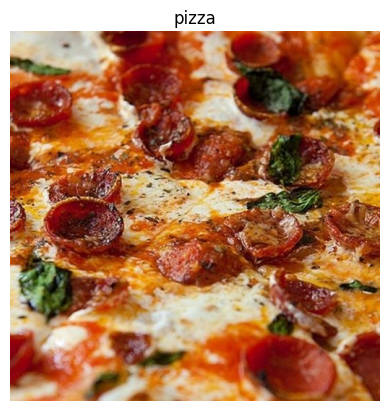

In [ ]:
# View a random image
img=view_random_image(target_dir="pizza_steak/train/",target_class="pizza")

In [ ]:
import tensorflow as tf
tf.constant(img)

<tf.Tensor: shape=(512, 512, 3), dtype=uint8, numpy=
array([[[208, 211, 204],
        [209, 212, 205],
        [210, 213, 206],
        ...,
        [230, 155,  88],
        [229, 150,  84],
        [222, 143,  76]],

       [[208, 211, 204],
        [209, 212, 205],
        [210, 213, 206],
        ...,
        [230, 151,  84],
        [226, 145,  79],
        [218, 138,  69]],

       [[209, 212, 205],
        [210, 213, 206],
        [211, 214, 207],
        ...,
        [224, 141,  71],
        [221, 134,  65],
        [214, 127,  56]],

       ...,

       [[230, 210, 175],
        [230, 210, 175],
        [233, 210, 176],
        ...,
        [107,  31,   7],
        [104,  28,   4],
        [106,  30,   6]],

       [[230, 208, 171],
        [230, 208, 171],
        [231, 207, 171],
        ...,
        [105,  30,   7],
        [102,  27,   4],
        [103,  28,   5]],

       [[228, 204, 168],
        [228, 204, 168],
        [229, 203, 168],
        ...,
        [101,  26,   

In [ ]:
# view the image shape
img.shape

(512, 512, 3)

In [ ]:
# Get all the pixel values between 0 &1
img/512

array([[[0.40625   , 0.41210938, 0.3984375 ],
        [0.40820312, 0.4140625 , 0.40039062],
        [0.41015625, 0.41601562, 0.40234375],
        ...,
        [0.44921875, 0.30273438, 0.171875  ],
        [0.44726562, 0.29296875, 0.1640625 ],
        [0.43359375, 0.27929688, 0.1484375 ]],

       [[0.40625   , 0.41210938, 0.3984375 ],
        [0.40820312, 0.4140625 , 0.40039062],
        [0.41015625, 0.41601562, 0.40234375],
        ...,
        [0.44921875, 0.29492188, 0.1640625 ],
        [0.44140625, 0.28320312, 0.15429688],
        [0.42578125, 0.26953125, 0.13476562]],

       [[0.40820312, 0.4140625 , 0.40039062],
        [0.41015625, 0.41601562, 0.40234375],
        [0.41210938, 0.41796875, 0.40429688],
        ...,
        [0.4375    , 0.27539062, 0.13867188],
        [0.43164062, 0.26171875, 0.12695312],
        [0.41796875, 0.24804688, 0.109375  ]],

       ...,

       [[0.44921875, 0.41015625, 0.34179688],
        [0.44921875, 0.41015625, 0.34179688],
        [0.45507812, 0

## An end-to-end example
* load images
* Preprocess our images
* build  a CNN to find the patterns in our images
* Compile our CNN
* fit the CNN to our training data

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# set the seed
tf.random.set_seed(42)
# preprocess data(get all data between 0 & 1 make scale)
train_datagen= ImageDataGenerator(rescale=1./255)
valid_datagen=ImageDataGenerator(rescale=1./255)


# Setup paths to our data dirextories
train_dir="/content/pizza_steak/train"
test_dir="/content/pizza_steak/test"


# import data from directories and trun it into batches
train_data=train_datagen.flow_from_directory(directory=train_dir,
                                             batch_size=32,
                                             target_size=(224,224),
                                            class_mode="binary",
                                             seed=42)
valid_data=valid_datagen.flow_from_directory(directory=test_dir,
                                             batch_size=32,
                                             target_size=(224,224),
                                             class_mode="binary",
                                             seed=42)

# Build a CNN model
model_1=tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=3,
                           activation="relu",
                           input_shape=(224,224,3)),
    tf.keras.layers.Conv2D(10,3,activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2,
                              padding="valid"),
    tf.keras.layers.Conv2D(10,3,activation="relu"),
    tf.keras.layers.Conv2D(10,3,activation="relu"),
    # tf.keras.layers.Activations(tf.nn.relu)
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1,activation="sigmoid")

])

# Compile our CNN
model_1.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit the model
history_1 = model_1.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


47/47 ━━━━━━━━━━━━━━━━━━━━ 22s 216ms/step - accuracy: 0.5454 - loss: 0.7282 - val_accuracy: 0.7280 - val_loss: 0.5444
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 391us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 3/5


/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


47/47 ━━━━━━━━━━━━━━━━━━━━ 6s 117ms/step - accuracy: 0.7413 - loss: 0.5309 - val_accuracy: 0.8060 - val_loss: 0.4467
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 102ms/step - accuracy: 0.8081 - loss: 0.4512 - val_accuracy: 0.8400 - val_loss: 0.3786


In [ ]:
model_1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 222, 222, 10)        │             280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 220, 220, 10)        │             910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 110, 110, 10)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 108, 108, 10)        │             910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 106, 106, 10)        │             910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 53, 53, 10)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 28090)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │          28,091 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 93,305 (364.48 KB)

 Trainable params: 31,101 (121.49 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 62,204 (242.99 KB)

In [ ]:
len(train_data)

47

In [ ]:
1500/32

46.875

## Using the same model as before

In [ ]:
# Set random
tf.random.set_seed(42)
# Create a model to replicate the TensorFlow Playground model
model_2=tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224,224,3)),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(1,activation="sigmoid")
])
# Compile
model_2.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit
history_2=model_2.fit(train_data,
                      epochs=5,
                      steps_per_epoch=len(train_data),
                      validation_data=valid_data,
                      validation_steps=len(valid_data))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 9s 142ms/step - accuracy: 0.5444 - loss: 8.6148 - val_accuracy: 0.5000 - val_loss: 0.6932
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 6s 95ms/step - accuracy: 0.4883 - loss: 0.6934 - val_accuracy: 0.5000 - val_loss: 0.6932
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 91ms/step - accuracy: 0.4928 - loss: 0.6933 - val_accuracy: 0.5000 - val_loss: 0.6932


In [ ]:
# Get a summary
model_2.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)                  │ (None, 150528)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 4)                   │         602,116 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 4)                   │              20 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │               5 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,806,425 (6.89 MB)

 Trainable params: 602,141 (2.30 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,204,284 (4.59 MB)

# Improve model_2

In [ ]:
tf.random.set_seed(42)
# Create a model
model_3=tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224,224,3)),
    tf.keras.layers.Dense(100,activation="relu"),
    tf.keras.layers.Dense(100,activation="relu"),
    tf.keras.layers.Dense(100,activation="relu"),
    tf.keras.layers.Dense(1,activation="sigmoid")
])

# Compile
model_3.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])
# Fit model
history_3=model_3.fit(train_data,
                      epochs=5,
                      steps_per_epoch=len(train_data),
                      validation_data=valid_data,
                      validation_steps=len(valid_data))

Epoch 1/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 10s 145ms/step - accuracy: 0.5490 - loss: 4.2157 - val_accuracy: 0.7500 - val_loss: 0.5821
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 90ms/step - accuracy: 0.7189 - loss: 0.6768 - val_accuracy: 0.7580 - val_loss: 0.5609
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 308us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 7s 143ms/step - accuracy: 0.7736 - loss: 0.4866 - val_accuracy: 0.5560 - val_loss: 0.8361


In [ ]:
#summary
model_3.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_2 (Flatten)                  │ (None, 150528)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 100)                 │      15,052,900 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 100)                 │          10,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 100)                 │          10,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 1)                   │             101 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 45,219,605 (172.50 MB)

 Trainable params: 15,073,201 (57.50 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 30,146,404 (115.00 MB)

In [ ]:
model_1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 222, 222, 10)        │             280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 220, 220, 10)        │             910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 110, 110, 10)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 108, 108, 10)        │             910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 106, 106, 10)        │             910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 53, 53, 10)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 28090)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │          28,091 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 93,305 (364.48 KB)

 Trainable params: 31,101 (121.49 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 62,204 (242.99 KB)

# Binary classification

['2223787.jpg']
Image shape : (384, 512, 3)
['1454995.jpg']
Image shape : (512, 505, 3)


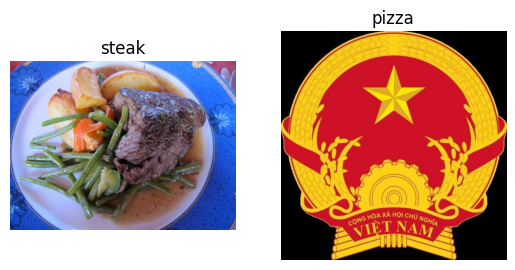

In [ ]:
# Visualize data
import matplotlib.pyplot as plt
plt.figure()
plt.subplot(1,2,1)
steak_img=view_random_image("pizza_steak/train/","steak")
plt.subplot(1,2,2)
pizza_img=view_random_image("pizza_steak/train/","pizza")

## 2. preprocess the data (prepare it for a model)



In [ ]:
# Define directory dataset path
train_dir="pizza_steak/train/"
test_dir="pizza_steak/test/"

the next step to turn our data to ***batches***


> a batch : is to make amodel deal with 32 image at one time insted of deal with all 100000 one time




In [ ]:
# Create train and test data generators and rescale the data
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen=ImageDataGenerator(rescale=1/255.)
test_datagen=ImageDataGenerator(rescale=1/255.)

In [ ]:
# Load in our image data from directories and turn them into batches
train_data=train_datagen.flow_from_directory(directory=train_dir,
                                             target_size=(224,224),
                                             class_mode="binary",
                                             batch_size=32)

test_data=test_datagen.flow_from_directory(directory=test_dir,
                                           target_size=(224,224),
                                           class_mode="binary",
                                           batch_size=32)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [ ]:
images_t, labels_t = next(test_data) # get the 'next' batch of images/labels
len(images_t), len(labels_t)

(32, 32)

In [ ]:
images_t[5].shape

(224, 224, 3)

In [ ]:
# Get a sample of the training data batch
images, labels = next(train_data) # get the 'next' batch of images/labels
len(images), len(labels)

(32, 32)

In [ ]:
len(train_data)

47

In [ ]:
# Get the first 2 image
images[:2],images[0].shape

(array([[[[0.7254902 , 0.8352942 , 0.7803922 ],
          [0.7254902 , 0.82745105, 0.77647066],
          [0.72156864, 0.8235295 , 0.7725491 ],
          ...,
          [0.6745098 , 0.7686275 , 0.7058824 ],
          [0.6509804 , 0.74509805, 0.68235296],
          [0.654902  , 0.74509805, 0.68235296]],
 
         [[0.7607844 , 0.86274517, 0.8117648 ],
          [0.75294125, 0.854902  , 0.80392164],
          [0.75294125, 0.854902  , 0.80392164],
          ...,
          [0.70980394, 0.80392164, 0.7411765 ],
          [0.6784314 , 0.7725491 , 0.70980394],
          [0.6666667 , 0.7607844 , 0.69803923]],
 
         [[0.7803922 , 0.882353  , 0.8313726 ],
          [0.77647066, 0.87843144, 0.82745105],
          [0.7843138 , 0.87843144, 0.82745105],
          ...,
          [0.7176471 , 0.8117648 , 0.7490196 ],
          [0.7176471 , 0.8117648 , 0.7490196 ],
          [0.69411767, 0.78823537, 0.7254902 ]],
 
         ...,
 
         [[0.43137258, 0.3803922 , 0.20392159],
          [0.44313

In [ ]:
images[7].shape

(224, 224, 3)

In [ ]:
# View the first batch of label
labels

array([0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 1., 0., 0., 1., 0.,
       0., 0., 0., 1., 1., 0., 1., 1., 0., 1., 0., 0., 0., 1., 1.],
      dtype=float32)

#3. Create a CNN model (start with base line)

In [ ]:
# Make the creating of our model a little easier
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten,Conv2D,MaxPool2D,Activation
from tensorflow.keras import Sequential

In [ ]:
model_4 = Sequential([
  Conv2D(filters=10,
         kernel_size=3,
         strides=1,
         padding='valid',
         activation='relu',
         input_shape=(224, 224, 3)), # input layer (specify input shape)
  Conv2D(10, 3, activation='relu'),
  Conv2D(10, 3, activation='relu'),
  Flatten(),
  Dense(1, activation='sigmoid') # output layer (specify output shape)
])

In [ ]:
# Compile the model
model_4.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])

In [ ]:
# Get summary
model_4.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)                    │ (None, 222, 222, 10)        │             280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 220, 220, 10)        │             910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 218, 218, 10)        │             910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 475240)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 1)                   │         475,241 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 477,341 (1.82 MB)

 Trainable params: 477,341 (1.82 MB)

 Non-trainable params: 0 (0.00 B)

###4. fit the model

In [ ]:
# Check the lenghts of training and teat data generators
len(train_data),len(test_data)

(47, 16)

In [ ]:
# Fit the model
history_4 = model_4.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 14s 201ms/step - accuracy: 0.5424 - loss: 1.9585 - val_accuracy: 0.7880 - val_loss: 0.4447
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 317us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 13s 102ms/step - accuracy: 0.8058 - loss: 0.4476 - val_accuracy: 0.8340 - val_loss: 0.3839
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 6s 115ms/step - accuracy: 0.8707 - loss: 0.3429 - val_accuracy: 0.8500 - val_loss: 0.3732


In [ ]:
images[5].shape

(224, 224, 3)

In [ ]:
model_1.evaluate(test_data)

16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 75ms/step - accuracy: 0.8311 - loss: 0.3914


[0.37864789366722107, 0.8399999737739563]

In [ ]:
model_4.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)                    │ (None, 222, 222, 10)        │             280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 220, 220, 10)        │             910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 218, 218, 10)        │             910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 475240)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 1)                   │         475,241 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,432,025 (5.46 MB)

 Trainable params: 477,341 (1.82 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 954,684 (3.64 MB)

In [ ]:
model_1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 222, 222, 10)        │             280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 220, 220, 10)        │             910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 110, 110, 10)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 108, 108, 10)        │             910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 106, 106, 10)        │             910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 53, 53, 10)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 28090)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │          28,091 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 93,305 (364.48 KB)

 Trainable params: 31,101 (121.49 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 62,204 (242.99 KB)

# 5. Evaluating our model

In [ ]:
history_4

In [ ]:
# import pandas as pd
# pd.DataFrame(history_2.history).plot();


In [ ]:
def plot_loss_curves(history):
  """
  Returns separate loss curves for training and validation metrics.
  """
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  # Plot loss
  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend();
# Check out the loss curves of model_4
# plot_loss_curves(history_1)

## 6. Adjust the model parameters


In [ ]:
# Create a model
model_5=Sequential([
    Conv2D(10,3,activation="relu",input_shape=(224,224,3)),
    MaxPool2D(pool_size=2),
    Conv2D(10,3,activation="relu"),
    MaxPool2D(2),
    Conv2D(10,3,activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(1,activation="sigmoid")
])

In [ ]:
# Compile
model_5.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

In [ ]:
# Fit
history_5=model_5.fit(train_data,
                      epochs=5,
                      steps_per_epoch=len(train_data),
                      validation_data=test_data,
                      validation_steps=len(test_data))

Epoch 1/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 12s 175ms/step - accuracy: 0.5735 - loss: 0.6594 - val_accuracy: 0.8080 - val_loss: 0.4387
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 48ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 96ms/step - accuracy: 0.7729 - loss: 0.4848 - val_accuracy: 0.8580 - val_loss: 0.3832
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 316us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 6s 113ms/step - accuracy: 0.8129 - loss: 0.4272 - val_accuracy: 0.8740 - val_loss: 0.3409


In [ ]:
# Get summay
model_5.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_7 (Conv2D)                    │ (None, 222, 222, 10)        │             280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 111, 111, 10)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 109, 109, 10)        │             910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 54, 54, 10)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 52, 52, 10)          │             910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 26, 26, 10)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_4 (Flatten)                  │ (None, 6760)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 1)                   │           6,761 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 26,585 (103.85 KB)

 Trainable params: 8,861 (34.61 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 17,724 (69.24 KB)

In [ ]:
model_4.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)                    │ (None, 222, 222, 10)        │             280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 220, 220, 10)        │             910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 218, 218, 10)        │             910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 475240)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 1)                   │         475,241 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,432,025 (5.46 MB)

 Trainable params: 477,341 (1.82 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 954,684 (3.64 MB)

## Opining our bag of tricks and finding data ougmantation

In [ ]:
# Create ImageDataGenerator training instance with data augmentation
train_datagen_augment=ImageDataGenerator(rescale=1/255,
                                         rotation_range=0.2,
                                         shear_range=0.2,
                                         zoom_range=0.2,
                                         width_shift_range=0.2,
                                         height_shift_range=0.3,
                                         horizontal_flip=True)
# Create ImageDataGenerator without data augmentation
train_datagen=ImageDataGenerator(rescale=1/255)

# Create ImageDataGenerator without data augmentataion for the test dataset
test_datagen=ImageDataGenerator(rescale=1/255)

In [ ]:
IMG_SIZE=(224,224)
# Import data and augment it
print("Agumented training data")
train_datagen_augment=train_datagen_augment.flow_from_directory(train_dir,
                                                                target_size=IMG_SIZE,
                                                                batch_size=32,
                                                                class_mode="binary",
                                                                shuffle=False)

# Create non-augmented train data batches
print("Non-augmented training data :")
train_data=train_datagen.flow_from_directory(train_dir,
                                             target_size=IMG_SIZE,
                                             batch_size=32,
                                             class_mode="binary",
                                             shuffle=False)

# Create non-augmented test data batches
print("non-augmented test data :")
test_data=test_datagen.flow_from_directory(test_dir,
                                           target_size=IMG_SIZE,
                                           batch_size=32,
                                           class_mode="binary",
                                           )

Agumented training data
Found 1500 images belonging to 2 classes.
Non-augmented training data :
Found 1500 images belonging to 2 classes.
non-augmented test data :
Found 500 images belonging to 2 classes.


In [ ]:
# get sample  data batches
images , labels=next(train_data)
augmented_images , augmented_labels=next(train_datagen_augment)


showing image number : 29


(-0.5, 223.5, 223.5, -0.5)

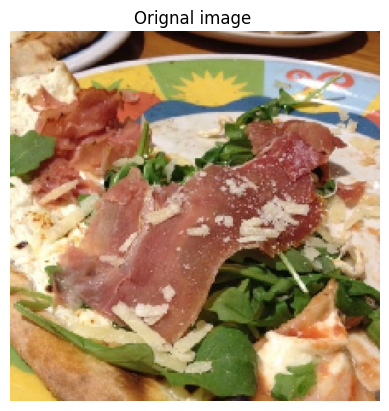

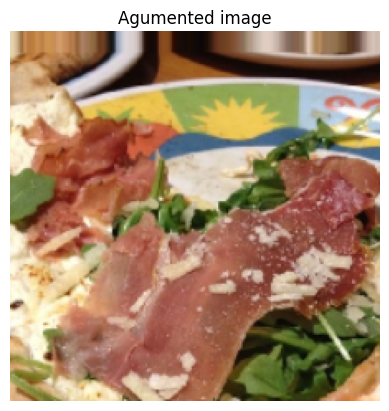

In [ ]:
# show orignial image and augmented
import random
random_number=random.randint(0,31) # Our batch size are 32 ...
print(f"showing image number : {random_number}")
plt.imshow(images[random_number])
plt.title("Orignal image ")
plt.axis(False)
plt.figure()
plt.imshow(augmented_images[random_number])
plt.title("Agumented image")
plt.axis(False)


In [ ]:
# Create a model
model_6=Sequential([
    Conv2D(10,3,activation="relu"),
    MaxPool2D(pool_size=2),
    Conv2D(10,3,activation="relu"),
    MaxPool2D(),
    Conv2D(10,3,activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(1,activation="sigmoid")
])

# compile
model_6.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

# Fit
history_6=model_6.fit(train_datagen_augment, # fitting model_6 on augmented training data
                      epochs=5,
                      steps_per_epoch=len(train_datagen_augment),
                      validation_data=test_data,
                      validation_steps=len(test_data))

Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


47/47 ━━━━━━━━━━━━━━━━━━━━ 23s 393ms/step - accuracy: 0.4538 - loss: 0.7537 - val_accuracy: 0.5440 - val_loss: 0.6918
Epoch 2/5


/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 39s 369ms/step - accuracy: 0.5511 - loss: 0.6917 - val_accuracy: 0.5820 - val_loss: 0.6814
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 303us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 19s 355ms/step - accuracy: 0.4708 - loss: 0.6932 - val_accuracy: 0.5180 - val_loss: 0.6747


In [ ]:
# Check
# plot_loss_curves(history_6)

# shuffle our augment training data and train another model

In [ ]:
# Create ImageDataGenerator training instance with data augmentation
train_datagen_augment=ImageDataGenerator(rescale=1/255,
                                         rotation_range=0.2,
                                         shear_range=0.2,
                                         zoom_range=0.2,
                                         width_shift_range=0.2,
                                         height_shift_range=0.3,
                                         horizontal_flip=True)
# Create ImageDataGenerator without data augmentation
train_datagen=ImageDataGenerator(rescale=1/255)

# Create ImageDataGenerator without data augmentataion for the test dataset
test_datagen=ImageDataGenerator(rescale=1/255)

In [ ]:
train_datagen_augment_shuffle=train_datagen_augment.flow_from_directory(train_dir,
                                                                        target_size=(224,224),
                                                                        class_mode="binary",
                                                                        batch_size=32,
                                                                        shuffle=True)

Found 1500 images belonging to 2 classes.


In [ ]:
# Create a model
model_7=Sequential([
    Conv2D(10,3,activation="relu",input_shape=(224,224,3)),
    MaxPool2D(),
    Conv2D(10,3,activation="relu"),
    MaxPool2D(),
    Conv2D(10,3,activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(1,activation="sigmoid")

])

# compile
model_7.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

# fit
history_7=model_7.fit(train_datagen_augment_shuffle,
            epochs=5,
            # steps_per_epoch=len(train_datagen_augment_shuffle),
            validation_data=test_data,
            # validation_steps=len(test_data)
            )

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 23s 371ms/step - accuracy: 0.5317 - loss: 0.6973 - val_accuracy: 0.6780 - val_loss: 0.5968
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 20s 372ms/step - accuracy: 0.6464 - loss: 0.6248 - val_accuracy: 0.7920 - val_loss: 0.4467
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 19s 360ms/step - accuracy: 0.7471 - loss: 0.5365 - val_accuracy: 0.7980 - val_loss: 0.4338
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 20s 359ms/step - accuracy: 0.7433 - loss: 0.5457 - val_accuracy: 0.8520 - val_loss: 0.3781
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 19s 362ms/step - accuracy: 0.7331 - loss: 0.5260 - val_accuracy: 0.8640 - val_loss: 0.3470


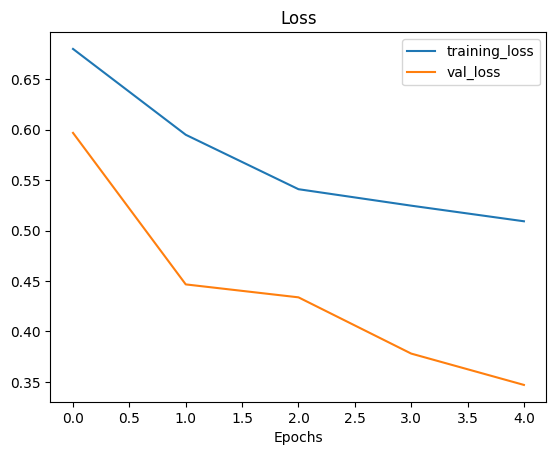

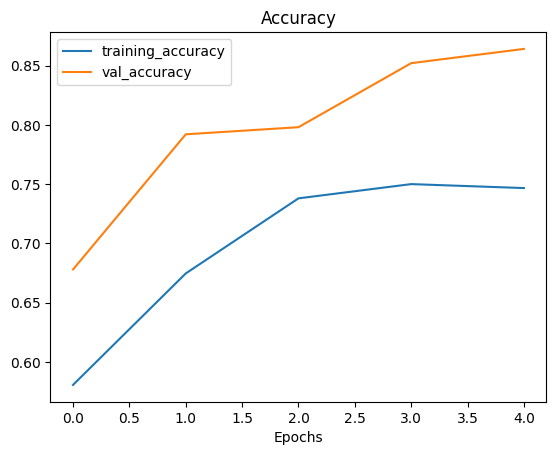

In [ ]:
plot_loss_curves(history_7)

### 7. Repeat until satisfied

# making a prediction with our trained model on our own cuastom

In [ ]:
# Class we're working with
print(class_names)

['pizza' 'steak']


In [ ]:
#View our example image
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
!wget https://github.com/mrdbourke/tensorflow-deep-learning/blob/main/images/03-steak.jpeg


--2024-09-03 11:48:31--  https://github.com/mrdbourke/tensorflow-deep-learning/blob/main/images/03-steak.jpeg
Resolving github.com (github.com)... 20.27.177.113
Connecting to github.com (github.com)|20.27.177.113|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘03-steak.jpeg’

03-steak.jpeg           [ <=>                ] 282.49K  1.83MB/s    in 0.2s    

2024-09-03 11:48:32 (1.83 MB/s) - ‘03-steak.jpeg’ saved [289265]



In [ ]:

# steak=mpimg.imread("/content/steak.jpeg")
# plt.imshow(steak)
# plt.axis(False)

In [ ]:
# check the shape
# steak.shape

In [ ]:
# Create a function to impoer and resize it
def load_and_prep_image(filename,image_shape=224):
  '''
  read an image from filename, turns it into a tensor and reshapes it (image_shape,image_shape,colour_channels)
  '''
  # Read in the image
  img=tf.io.read_file(filename)
  # Decode the read file into a tensor
  img=tf.image.decode_image(img)
  #Resize
  img=tf.image.resize(img,size=[image_shape,image_shape])
  #Rescale the image (get all values btwen 0 & 1 )
  img=img/255
  return img

In [ ]:
# steak=load_and_prep_image("/content/steak.jpeg")
# steak

In [ ]:
# pred=model_7.predict(tf.expand_dims(steak,axis=0))
# pred

# looks like our custom image is being put through our model


In [ ]:
# remine
class_names

array(['pizza', 'steak'], dtype='<U5')

In [ ]:
# we can index the predicted class by riunding the orediction probability and indexing it on the class names
# pred_class=class_names[int(tf.round(pred))]
# pred_class

In [ ]:
def pred_and_plot(model,filename,class_names=class_names):
  # Import the target image and preprocess it
  img=load_and_prep_image(filename)
  # Make a prediction
  pred=model.predict(tf.expand_dims(img,axis=0))
  # Get the predicted class
  pred_class=class_names[int(tf.round(pred))]

  # plot the image
  plt.imshow(img)
  plt.title(f"Prediction : {pred_class}")
  plt.axis(False);

In [ ]:
# #test our model on a custom image
# pred_and_plot(model_7,"/content/steak.jpeg")

In [ ]:
# pred_and_plot(model_7,"/content/pizza.jpg")

# Multi-class Image Classification

1. become one with the data
2. preprocess the data (get ready for the model )
3. create a model
4. fit the model ( overfit it to make sure it work )
5. Evaliuate the model
6. adjust different hyperparameters and improve the model
7. Repeat until satisified

## 1. Import and become one with data

In [ ]:
import zipfile
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
# unzip our data
zip_ref=zipfile.ZipFile("10_food_classes_all_data.zip","r")
zip_ref.extractall()
zip_ref.close()

--2024-09-03 18:25:34--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.24.207, 142.251.10.207, 142.251.12.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.24.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M  18.9MB/s    in 28s     

2024-09-03 18:26:02 (18.0 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]



In [ ]:
import os
# walk throgh 10 class
for dirpath,dirnames,filenames in os.walk("/content/10_food_classes_all_data"):
  print(f"There ara {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There ara 2 directories and 0 images in '/content/10_food_classes_all_data'.
There ara 10 directories and 0 images in '/content/10_food_classes_all_data/train'.
There ara 0 directories and 750 images in '/content/10_food_classes_all_data/train/sushi'.
There ara 0 directories and 750 images in '/content/10_food_classes_all_data/train/ramen'.
There ara 0 directories and 750 images in '/content/10_food_classes_all_data/train/grilled_salmon'.
There ara 0 directories and 750 images in '/content/10_food_classes_all_data/train/steak'.
There ara 0 directories and 750 images in '/content/10_food_classes_all_data/train/pizza'.
There ara 0 directories and 750 images in '/content/10_food_classes_all_data/train/hamburger'.
There ara 0 directories and 750 images in '/content/10_food_classes_all_data/train/chicken_wings'.
There ara 0 directories and 750 images in '/content/10_food_classes_all_data/train/ice_cream'.
There ara 0 directories and 750 images in '/content/10_food_classes_all_data/train/fri

In [ ]:
!ls -la /content/10_food_classes_all_data

total 16
drwxr-xr-x  4 root root 4096 Sep  3 18:26 .
drwxr-xr-x  1 root root 4096 Sep  3 18:26 ..
drwxr-xr-x 12 root root 4096 Sep  3 18:26 test
drwxr-xr-x 12 root root 4096 Sep  3 18:26 train


In [ ]:
# setup train and test directory
train_dir="/content/10_food_classes_all_data/train/"
test_dir="/content/10_food_classes_all_data/test/"


In [ ]:
# Let's get class name
import pathlib
import numpy as np
data_dir=pathlib.Path(train_dir)
class_names=np.array(sorted([item.name for item in data_dir.glob("*")]))
print(class_names)

['chicken_curry' 'chicken_wings' 'fried_rice' 'grilled_salmon' 'hamburger'
 'ice_cream' 'pizza' 'ramen' 'steak' 'sushi']


In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir,target_class):
  # setup the target directory
  target_folder = target_dir+target_class
  # Get a random image path
  random_image =random.sample(os.listdir(target_folder),1)
  print(random_image)
  #Read in the image
  img=mpimg.imread(target_folder+"/"+random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");
  print(F"Image shape : {img.shape}")
  return img

['194074.jpg']
Image shape : (512, 384, 3)


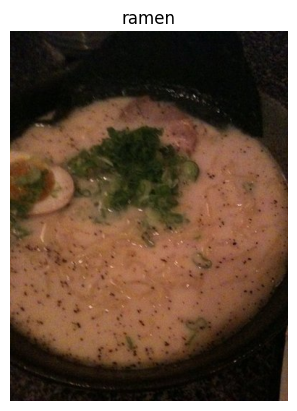

In [ ]:
# Visualize
import random
img=view_random_image(target_dir=train_dir,
                      target_class=random.choice(class_names))



## 2. preprocess the data (prepare it for a model)


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# Rescale
train_datagen =ImageDataGenerator(rescale=1/255)
test_datagen=ImageDataGenerator(rescale=1/255)

# Load data in from directories and turn it into batches
train_data=train_datagen.flow_from_directory(train_dir,target_size=(224,224),
                                             batch_size=32,
                                             class_mode="categorical"
                                             )
test_data=test_datagen.flow_from_directory(test_dir,target_size=(224,224),
                                           batch_size=32,
                                           class_mode="categorical")


Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPool2D,Flatten,Dense,Activation
from tensorflow.keras.optimizers import Adam
model_8=Sequential([
    Conv2D(10,3,input_shape=(224,224,3)),
    Activation(activation="relu"),
    # MaxPool2D(),
    Conv2D(10,3,activation="relu"),
    MaxPool2D(),
    Conv2D(10,3,activation="relu"),
    Conv2D(10,3,activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(10,activation="softmax") # change to have 10 output neurons and use the softmax activation function

])

# compile
model_8.compile(loss="categorical_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])



/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


## Fit the model

In [ ]:
history_8=model_8.fit(train_data,
                      epochs=5,
                      validation_data=test_data)

Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


235/235 ━━━━━━━━━━━━━━━━━━━━ 43s 144ms/step - accuracy: 0.1366 - loss: 2.2991 - val_accuracy: 0.2020 - val_loss: 2.1902
Epoch 2/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 27s 113ms/step - accuracy: 0.2547 - loss: 2.0753 - val_accuracy: 0.2840 - val_loss: 1.9830
Epoch 3/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 41s 113ms/step - accuracy: 0.4276 - loss: 1.6805 - val_accuracy: 0.2900 - val_loss: 2.0776
Epoch 4/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 27s 114ms/step - accuracy: 0.6536 - loss: 1.0628 - val_accuracy: 0.2684 - val_loss: 2.4454
Epoch 5/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 27s 113ms/step - accuracy: 0.9057 - loss: 0.3464 - val_accuracy: 0.2608 - val_loss: 3.7931


## 5. evaluate the model

In [ ]:
#Evaluate on the test
model_8.evaluate(test_data)

79/79 ━━━━━━━━━━━━━━━━━━━━ 6s 75ms/step - accuracy: 0.2722 - loss: 3.7754


[3.793107748031616, 0.26080000400543213]

In [ ]:
def plot_loss_curves(history):
  """
  Returns separate loss curves for training and validation metrics.
  """
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  # Plot loss
  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend();

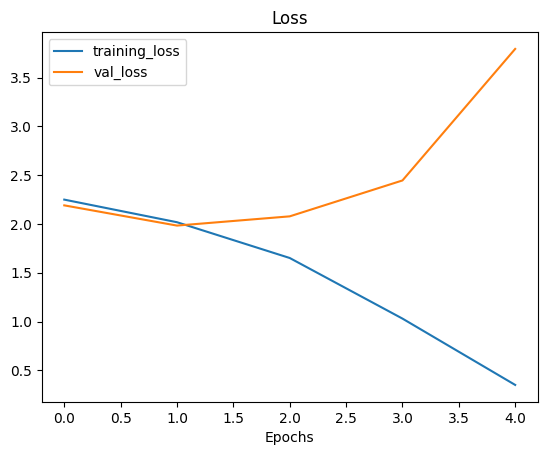

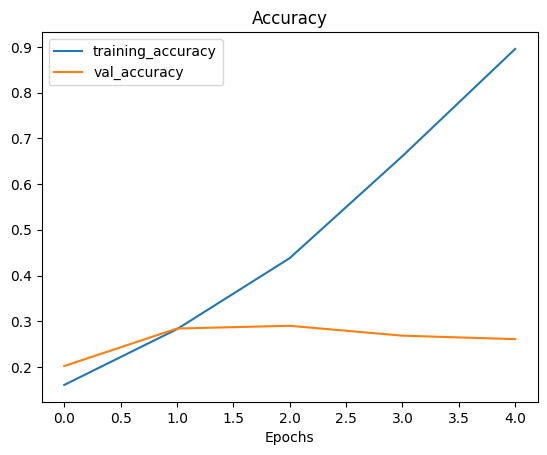

In [ ]:
# checl out the model's
plot_loss_curves(history_8)

##6. Adjust the model hyperparameters (tobeat the baseline / reduce overfiting)

In [ ]:
# How about we try simplify the model first?
# Let's try to remove 2 convolution layers

model_9=Sequential([
    Conv2D(10,3,activation="relu",input_shape=(224,224,3)),
    MaxPool2D(),
    Conv2D(10,3,activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(10,activation="softmax")

])
# compile
model_9.compile(loss="categorical_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

In [ ]:
# Fit
history_9=model_9.fit(train_data,epochs=5,
                      validation_data=test_data)

Epoch 1/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 32s 120ms/step - accuracy: 0.1815 - loss: 2.2745 - val_accuracy: 0.3272 - val_loss: 1.9298
Epoch 2/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 31s 130ms/step - accuracy: 0.3837 - loss: 1.7974 - val_accuracy: 0.3512 - val_loss: 1.8789
Epoch 3/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 31s 130ms/step - accuracy: 0.5302 - loss: 1.4599 - val_accuracy: 0.3388 - val_loss: 1.9418
Epoch 4/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 37s 112ms/step - accuracy: 0.7117 - loss: 0.9442 - val_accuracy: 0.3196 - val_loss: 2.2009
Epoch 5/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 41s 112ms/step - accuracy: 0.8640 - loss: 0.5288 - val_accuracy: 0.3316 - val_loss: 2.5036


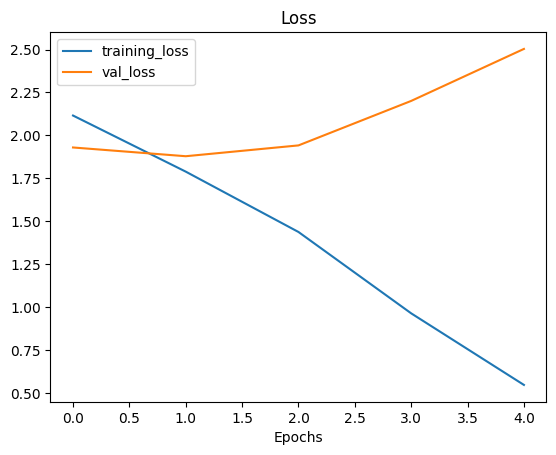

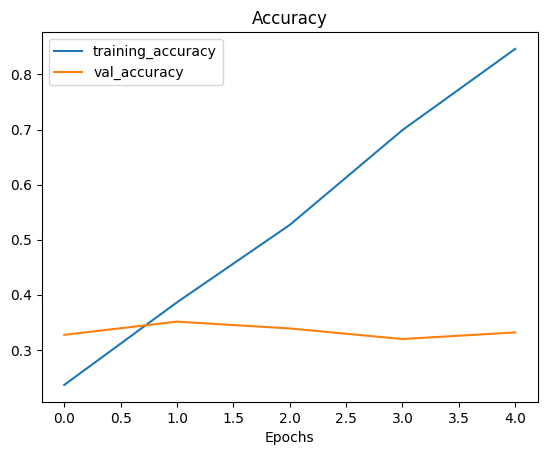

In [ ]:
# visualize
plot_loss_curves(history_9)

In [ ]:
model_9.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)                    │ (None, 222, 222, 10)        │             280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 111, 111, 10)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 109, 109, 10)        │             910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 54, 54, 10)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 29160)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │         291,610 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 878,402 (3.35 MB)

 Trainable params: 292,800 (1.12 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 585,602 (2.23 MB)

In [ ]:
model_8.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 222, 222, 10)        │             280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ (None, 222, 222, 10)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 220, 220, 10)        │             910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 110, 110, 10)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 108, 108, 10)        │             910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 106, 106, 10)        │             910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 53, 53, 10)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 28090)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 10)                  │         280,910 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 851,762 (3.25 MB)

 Trainable params: 283,920 (1.08 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 567,842 (2.17 MB)

### data augmentaion

In [ ]:
# Create an  augmented
train_datagen_augment=ImageDataGenerator(rescale=1/255,
                                         rotation_range=0.2,
                                         zoom_range=0.2,
                                         width_shift_range=0.2,
                                         height_shift_range=0.3,
                                         horizontal_flip=True,
                                        )

In [ ]:
train_data_augment=train_datagen_augment.flow_from_directory(directory=train_dir,
                                                             target_size=(224,224),
                                                             class_mode="categorical",
                                                             batch_size=32)

Found 7500 images belonging to 10 classes.


In [ ]:
# create another model but this time we'll fit it on augmented

model_10=tf.keras.models.clone_model(model_8)

# compile the cloned model
model_10.compile(loss="categorical_crossentropy",
                 optimizer=Adam(),
                 metrics=["accuracy"])


In [ ]:
# Fit the model
history_10=model_10.fit(train_data_augment,
                        epochs=5,
                        validation_data=test_data)

Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


235/235 ━━━━━━━━━━━━━━━━━━━━ 106s 429ms/step - accuracy: 0.1108 - loss: 2.3189 - val_accuracy: 0.1620 - val_loss: 2.2273
Epoch 2/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 139s 419ms/step - accuracy: 0.1510 - loss: 2.2624 - val_accuracy: 0.2136 - val_loss: 2.1534
Epoch 3/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 104s 425ms/step - accuracy: 0.1978 - loss: 2.1974 - val_accuracy: 0.2616 - val_loss: 2.0832
Epoch 4/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 107s 440ms/step - accuracy: 0.2354 - loss: 2.1321 - val_accuracy: 0.2848 - val_loss: 2.0380
Epoch 5/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 106s 440ms/step - accuracy: 0.2632 - loss: 2.0898 - val_accuracy: 0.3268 - val_loss: 1.9459


In [ ]:
model_8.evaluate(test_data)

79/79 ━━━━━━━━━━━━━━━━━━━━ 6s 76ms/step - accuracy: 0.2533 - loss: 3.8896


[3.793107509613037, 0.26080000400543213]

In [ ]:
model_10.evaluate(test_data)

79/79 ━━━━━━━━━━━━━━━━━━━━ 7s 86ms/step - accuracy: 0.3460 - loss: 1.9316


[1.945920705795288, 0.32679998874664307]

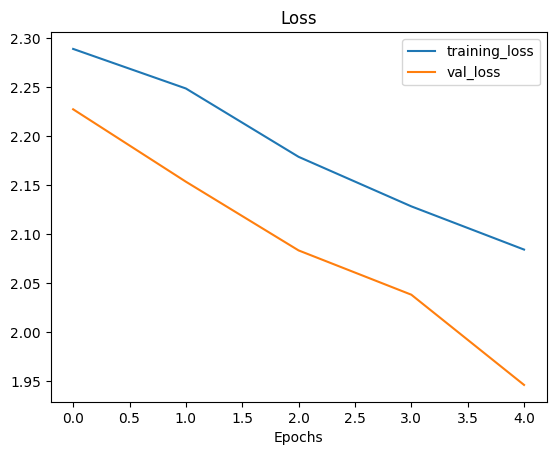

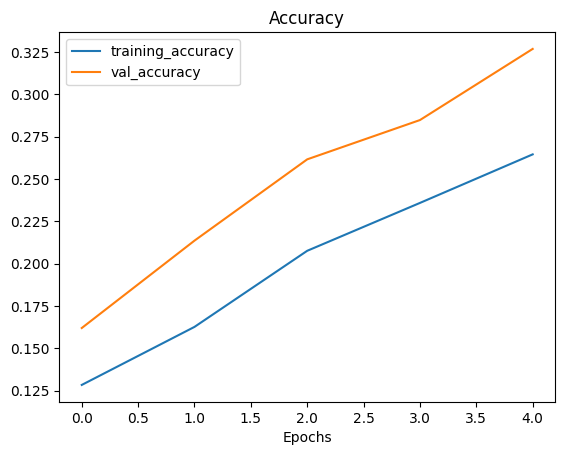

In [ ]:
# Check out loss'curve
plot_loss_curves(history_10)

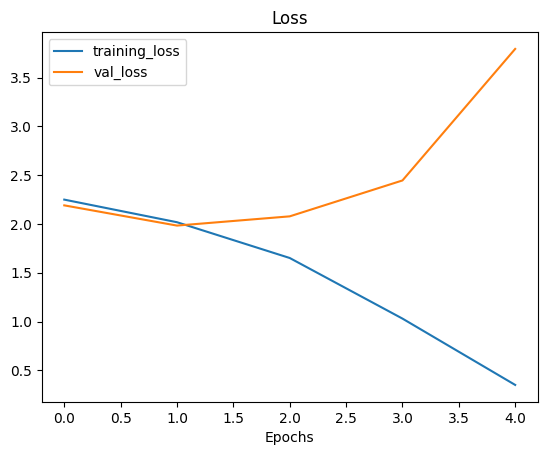

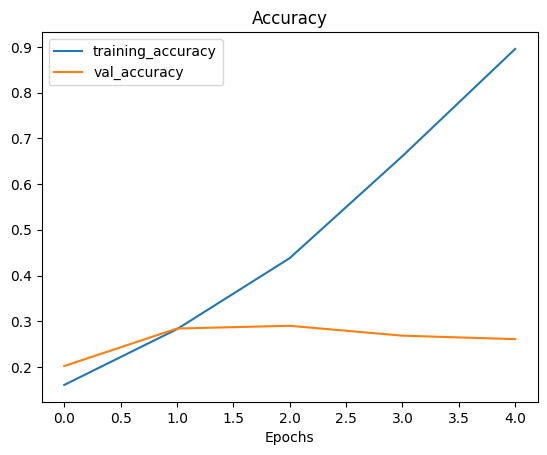

In [ ]:
plot_loss_curves(history_8)

##7.Repeat until satisified

In [ ]:
# Make a predictions with our trained model

In [ ]:
class_names

array(['chicken_curry', 'chicken_wings', 'fried_rice', 'grilled_salmon',
       'hamburger', 'ice_cream', 'pizza', 'ramen', 'steak', 'sushi'],
      dtype='<U14')

In [ ]:
# Download custom images

In [ ]:
# Create a function to impoer and resize it
def load_and_prep_image(filename,image_shape=224):
  '''
  read an image from filename, turns it into a tensor and reshapes it (image_shape,image_shape,colour_channels)
  '''
  # Read in the image
  img=tf.io.read_file(filename)
  # Decode the read file into a tensor
  img=tf.image.decode_image(img)
  #Resize
  img=tf.image.resize(img,size=[image_shape,image_shape])
  #Rescale the image (get all values btwen 0 & 1 )
  img=img/255
  return img

In [ ]:
def pred_and_plot(model,filename,class_names=class_names):
  # Import the target image and preprocess it
  img=load_and_prep_image(filename)
  # Make a prediction
  pred=model.predict(tf.expand_dims(img,axis=0))
  print(len(pred[0]))
  # Add a logic for multi-class & get pred_class name
  if len(pred[0])>1:
    pred_class= class_names[tf.argmax(pred[0])]
  else :
      pred_class=class_names[int(tf.round(pred))]

  # plot the image
  plt.imshow(img)
  plt.title(f"Prediction : {pred_class}")
  plt.axis(False);

In [ ]:
list[class_names]

list[array(['chicken_curry', 'chicken_wings', 'fried_rice', 'grilled_salmon',
       'hamburger', 'ice_cream', 'pizza', 'ramen', 'steak', 'sushi'],
      dtype='<U14')]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
10


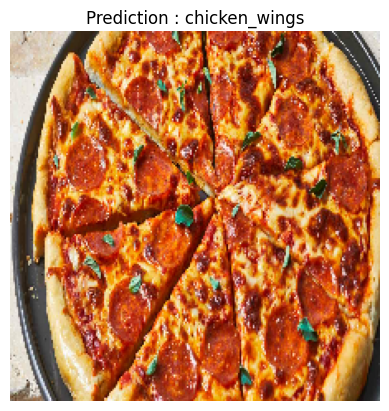

In [ ]:
# Make a prediction using model_10
pred_and_plot(model=model_10,filename="/content/pizza.jpg",class_names=class_names)

## Saving and load a model

In [ ]:
# Save a model
model_10.save("saved_trained_model_10.h5")

In [ ]:
# Save a model
model_10.save("saved_trained_model_10.keras")

In [ ]:
# Load in a trained model and evaluate it
loaded_model_10=tf.keras.models.load_model("saved_trained_model_10.keras")

/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:576: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 12 variables whereas the saved optimizer has 22 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [ ]:
loaded_model_10.evaluate(test_data)

79/79 ━━━━━━━━━━━━━━━━━━━━ 9s 94ms/step - accuracy: 0.3363 - loss: 1.9568


[1.9459209442138672, 0.32679998874664307]

In [ ]:
model_10.evaluate(test_data)

79/79 ━━━━━━━━━━━━━━━━━━━━ 7s 93ms/step - accuracy: 0.3320 - loss: 1.9263


[1.945920705795288, 0.32679998874664307]